In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

The singular value decomposition is an extremely useful practical and theoretical tool. We can decompose a $m\times n$ matrix $A$ as

$$A=U\Sigma V^{T},$$
where $U$ is a $m\times m$ matrix with orthonormal columns (called left singular vectors), $V$ is a $n\times n$ matrix with orthonormal columns (called right singular vectors), and $\Sigma$ is a diagonal matrix with positive entries decreasing in magnitude (called singular values).

In [ ]:
# the matrix
A = [ [3,0,5], [8,1,3] ]

U,S,V = np.linalg.svd(A)

print(U), print(' ')
print(S), print(' ')
print(V)

[[-0.52138438 -0.85332193]
 [-0.85332193  0.52138438]]
 
[9.89086518 3.18916698]
 
[[-0.84833111 -0.08627374 -0.52238986]
 [ 0.50518185  0.16348607 -0.84738634]
 [-0.15851066  0.98276607  0.09510639]]


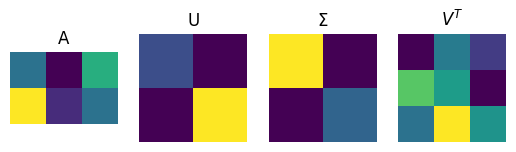

In [ ]:
plt.subplot(141)
plt.imshow(A)
plt.title('A')
plt.axis('off')

plt.subplot(142)
plt.imshow(U)
plt.title('U')
plt.axis('off')

plt.subplot(143)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')
plt.axis('off')

plt.subplot(144)
plt.imshow(V)
plt.title('$V^T$')
plt.axis('off')

plt.show()

# Relation between singular values and eigenvalues

In [ ]:
# case 1: eig(A'A) vs. svd(A)

A = np.array([ [3,1,0], [1,1,0] ])

print( np.sort(np.linalg.eig(A.T@A)[0]) )
print( np.sort(np.linalg.svd(A)[1])**2 )

[ 0.          0.34314575 11.65685425]
[ 0.34314575 11.65685425]


In [ ]:
# case 2: eig(A'A) vs. svd(A'A)

print(np.sort(np.linalg.eig(A.T@A)[0]))
print(np.sort(np.linalg.svd(A.T@A)[1]))

[ 0.          0.34314575 11.65685425]
[ 0.          0.34314575 11.65685425]


# Spectral theory of matrices

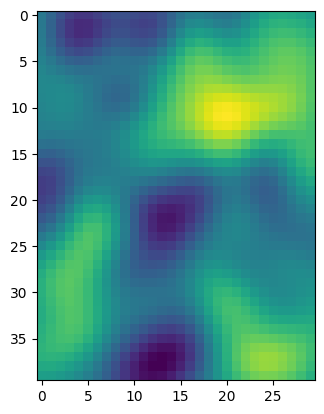

In [ ]:
# matrix sizes
m = 40
n = 30

# define a 2D Gaussian for smoothing
k = int( (m+n)/4 )
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8))

# matrix
A = scipy.signal.convolve2d(np.random.randn(m,n),g2d,'same')

plt.imshow(A)
plt.show()

<ipython-input-14-b504e8f7de1c>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(241)


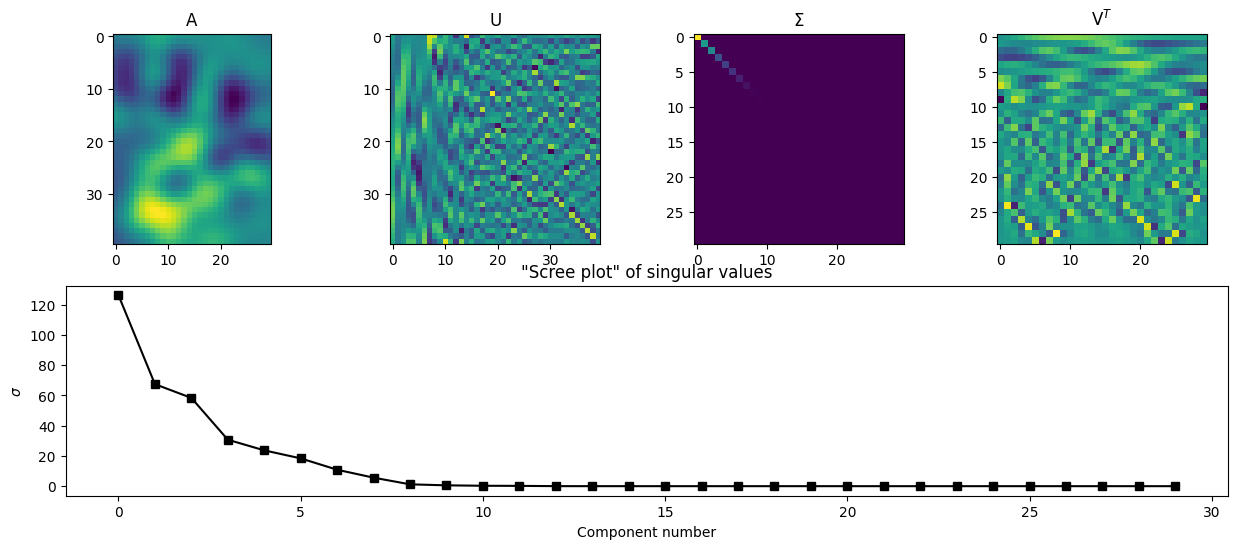

In [ ]:
# SVD (remember that V comes out transposed)
U,S,V = np.linalg.svd(A)


# show the constituent matrices
fig = plt.subplots(1,figsize=(15,6))

plt.subplot(241)
plt.imshow(A)
plt.title('A')

plt.subplot(242)
plt.imshow(U)
plt.title('U')

plt.subplot(243)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')

plt.subplot(244)
plt.imshow(V)
plt.title('V$^T$')

plt.subplot(212)
plt.plot(S,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('"Scree plot" of singular values')

plt.show()

# SVD and Pseudoinverse matrix

Given the singular decomposition of a matrix $A$,

$$A=U\Sigma V^{T},$$

the Moore-Penrose pseudoinverse is given by

$$A^{+}=V\Sigma^{+} U^{T},$$

where $\Sigma^{+}$  is formed from $\Sigma$ by taking the reciprocal of all the non-zero elements, leaving all the zeros alone, and making the matrix the right shape: if $\Sigma$ is an m by n matrix, then $\Sigma^{+}$ must be an n by m matrix.





In [ ]:
# the matrix
A = [ [1,0,3],
      [1,0,4], # hint: change 2->0 for invertible matrix to test
      [1,0,5]  ]

In [ ]:
U,S,V = np.linalg.svd(A)

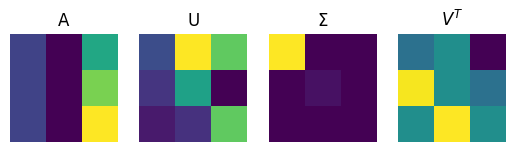

In [ ]:
plt.subplot(141)
plt.imshow(A)
plt.title('A')
plt.axis('off')

plt.subplot(142)
plt.imshow(U)
plt.title('U')
plt.axis('off')

plt.subplot(143)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')
plt.axis('off')

plt.subplot(144)
plt.imshow(V)
plt.title('$V^T$')
plt.axis('off')

plt.show()

In [ ]:

# pseudoinvert S
nonzeroels = S>10**-14 # find nonzero elements (>rounding errors)
S[nonzeroels] = 1/S[nonzeroels] # invert only those elements

# now pseudoinvert A
Ai = V.T@np.diag(S)@U.T

# it's sortof close to I...?
print( Ai@A ), print(' ')

# compute with pinv function
print( np.linalg.pinv(A)@A )

[[ 1.00000000e+00  0.00000000e+00 -2.22044605e-15]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.11022302e-16  0.00000000e+00  1.00000000e+00]]
 
[[ 1.00000000e+00  0.00000000e+00 -2.22044605e-15]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.11022302e-16  0.00000000e+00  1.00000000e+00]]


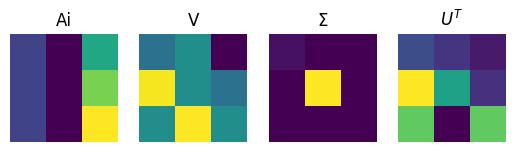

In [ ]:
plt.subplot(141)
plt.imshow(A)
plt.title('Ai')
plt.axis('off')

plt.subplot(142)
plt.imshow(V)
plt.title('V')
plt.axis('off')

plt.subplot(143)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')
plt.axis('off')

plt.subplot(144)
plt.imshow(U.T)
plt.title('$U^T$')
plt.axis('off')

plt.show()